In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("census_data.csv")
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual-income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K


In [3]:
#sns.heatmap(dataset.corr(),annot=True)

In [4]:
rows_columns=dataset.shape

In [5]:
rows_columns

(2707, 15)

In [6]:
dataset['annual-income']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
2702     <=50K
2703     <=50K
2704     <=50K
2705     <=50K
2706       NaN
Name: annual-income, Length: 2707, dtype: object

In [7]:
dataset['sex'].fillna(method='ffill',inplace=True)

In [8]:
dataset['sex']

0          Male
1          Male
2          Male
3        Female
4        Female
         ...   
2702       Male
2703     Female
2704     Female
2705       Male
2706       Male
Name: sex, Length: 2707, dtype: object

In [9]:
dataset['workclass'].fillna(method='ffill',inplace=True)
dataset['workclass']

0        Self-emp-not-inc
1                 Private
2                 Private
3                 Private
4                 Private
              ...        
2702              Private
2703              Private
2704              Private
2705            Local-gov
2706     Self-emp-not-inc
Name: workclass, Length: 2707, dtype: object

In [10]:
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      1
capital-loss      1
hours-per-week    1
native-country    1
annual-income     1
dtype: int64

In [11]:
dataset.dropna(inplace=True)
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual-income     0
dtype: int64

In [12]:
dataset.shape

(2706, 15)

In [13]:
dataset.drop_duplicates(subset=None, inplace=True)

In [14]:
dataset.shape

(2706, 15)

In [15]:
dataset.drop(dataset[dataset['age'] == ' ?'].index, inplace = True)

In [16]:
dataset.shape

(2706, 15)

In [17]:
dataset.drop(dataset[dataset['workclass'] == ' ?'].index, inplace = True)

In [18]:
dataset.shape

(2528, 15)

In [19]:
dataset.drop(dataset[dataset['fnlwgt'] == ' ?'].index, inplace = True)

In [20]:
dataset.shape

(2528, 15)

In [21]:
dataset.drop(dataset[dataset['education'] == ' ?'].index, inplace = True)

In [22]:
dataset.shape

(2528, 15)

In [23]:
dataset.drop(dataset[dataset['education-num'] == ' ?'].index, inplace = True)

In [24]:
dataset.shape

(2528, 15)

In [25]:
dataset.drop(dataset[dataset['marital-status'] == ' ?'].index, inplace = True)

In [26]:
dataset.shape

(2528, 15)

In [27]:
dataset.drop(dataset[dataset['occupation'] == ' ?'].index, inplace = True)

In [28]:
dataset.shape

(2528, 15)

In [29]:
dataset.drop(dataset[dataset['relationship'] == ' ?'].index, inplace = True)
dataset.shape

(2528, 15)

In [30]:
dataset.drop(dataset[dataset['race'] == ' ?'].index, inplace = True)
dataset.shape

(2528, 15)

In [31]:
dataset.drop(dataset[dataset['sex'] == ' ?'].index, inplace = True)
dataset.shape

(2528, 15)

In [32]:
dataset.drop(dataset[dataset['native-country'] == ' ?'].index, inplace = True)
dataset.shape

(2481, 15)

In [33]:
dataset.drop(dataset[dataset['capital-gain'] == ' ?'].index, inplace = True)
dataset.shape

(2481, 15)

In [34]:
dataset.drop(dataset[dataset['capital-loss'] == ' ?'].index, inplace = True)
dataset.shape

(2481, 15)

In [35]:
dataset.drop(dataset[dataset['hours-per-week'] == ' ?'].index, inplace = True)
dataset.shape

(2481, 15)

In [36]:
dataset.drop(dataset[dataset['annual-income'] == ' ?'].index, inplace = True)
dataset.shape

(2481, 15)

In [37]:
dataset=dataset.sample(700,replace=False,axis=0)
dataset.shape

(700, 15)

In [38]:
import pandas as pd
import numpy as np
df = pd.DataFrame(dataset)
x_data= df[['hours-per-week','education-num','capital-gain','capital-loss']]
x_data= x_data.apply(lambda x:(x -x.min(axis=0)) / (x.max(axis=0)-x.min(axis=0)))
print(x_data.head(50))


      hours-per-week  education-num  capital-gain  capital-loss
1469        0.000000       0.928571      0.000000      0.000000
1474        0.351064       0.500000      0.000000      0.000000
817         0.425532       0.500000      0.000000      0.000000
298         0.797872       0.500000      0.000000      0.000000
1376        0.372340       0.500000      0.000000      0.000000
140         0.372340       0.571429      0.000000      0.000000
1           0.372340       0.500000      0.000000      0.000000
260         0.585106       0.500000      0.000000      0.000000
72          0.372340       0.571429      0.000000      0.000000
1202        0.372340       0.785714      0.000000      0.000000
2001        0.372340       0.500000      0.014090      0.000000
2131        0.372340       0.500000      0.000000      0.000000
978         0.372340       0.500000      0.000000      0.000000
380         0.425532       0.071429      0.000000      0.918335
592         0.372340       0.785714     

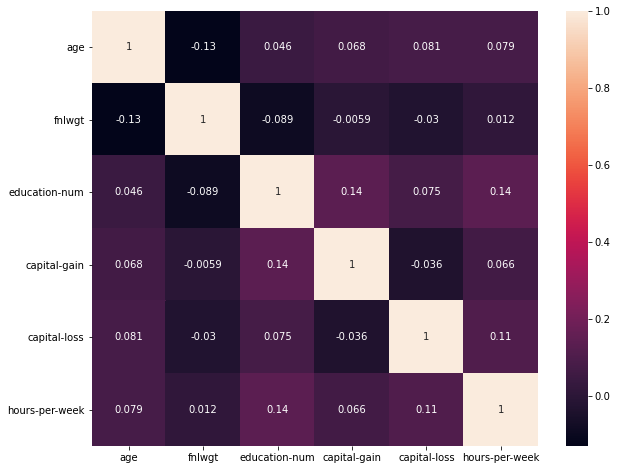

In [48]:
#heat map for correlation
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot=True)

correlation matrix specifies how the variable are inter-related with each other

1.) a negative correlation represents that when one value increases the other value decreases

2.) a positive correlation represents that when one value increases the other value also increases and vice versa

### EXPLORATORY DATA ANALYSIS

<BarContainer object of 700 artists>

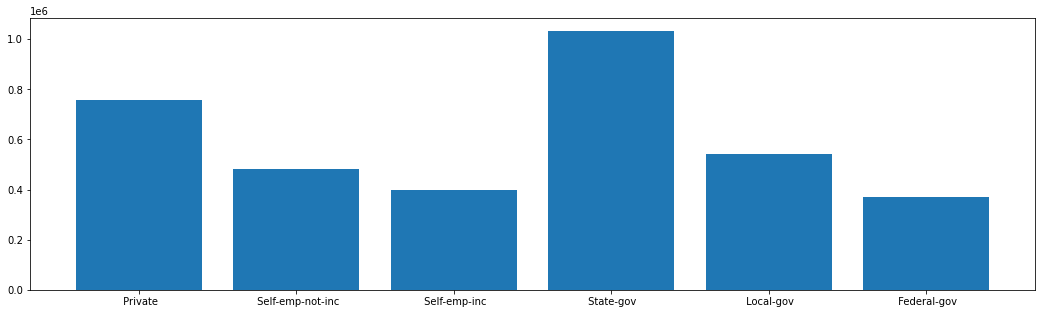

In [39]:
fig,ax=plt.subplots(figsize=(18,5))
df=pd.DataFrame(dataset)
ax.bar(df['workclass'],df['fnlwgt'])

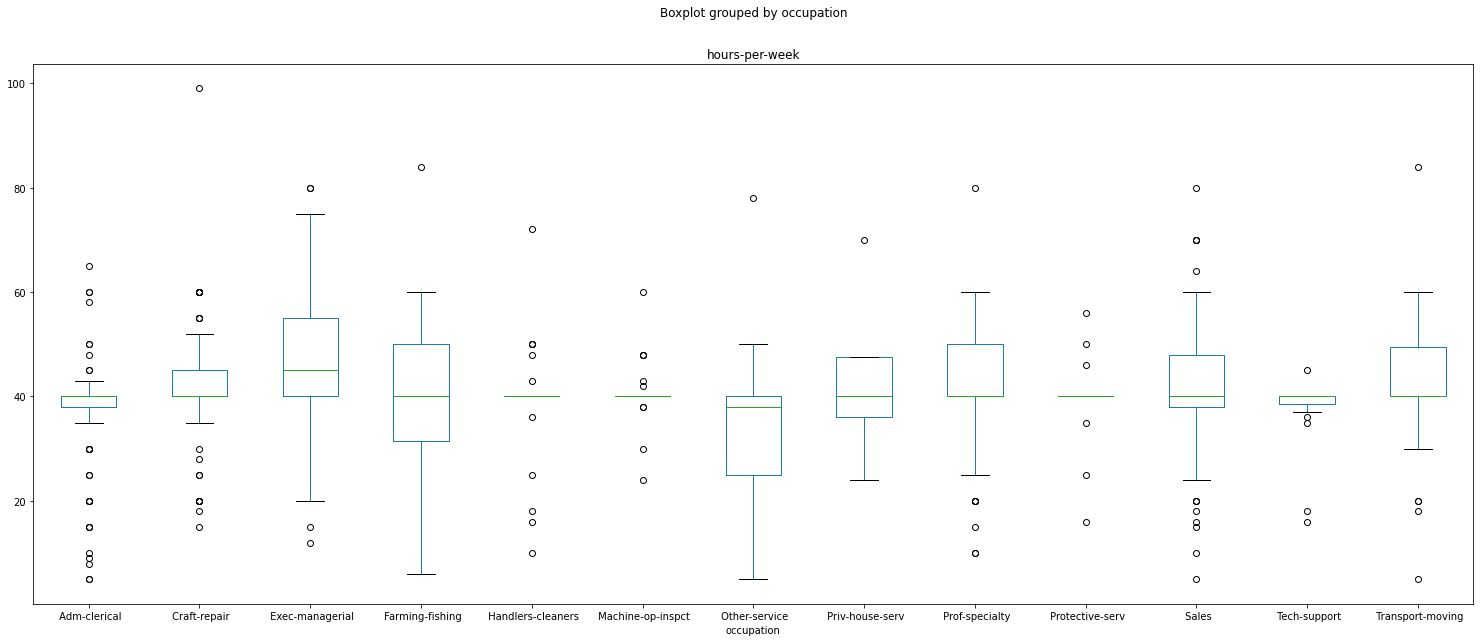

In [40]:
df.boxplot(by ='occupation', column =['hours-per-week'], grid = False, figsize=(25,10))

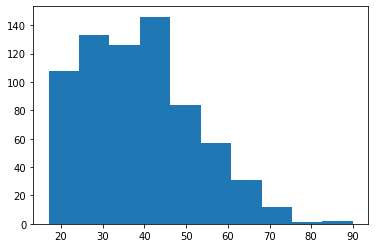

In [41]:
plt.hist(df['age'])
plt.show()

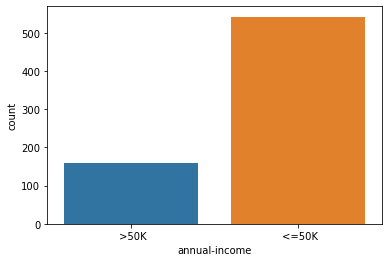

In [49]:
sns.countplot(dataset['annual-income'])

Inference : A lot of people have a salary <= 50k

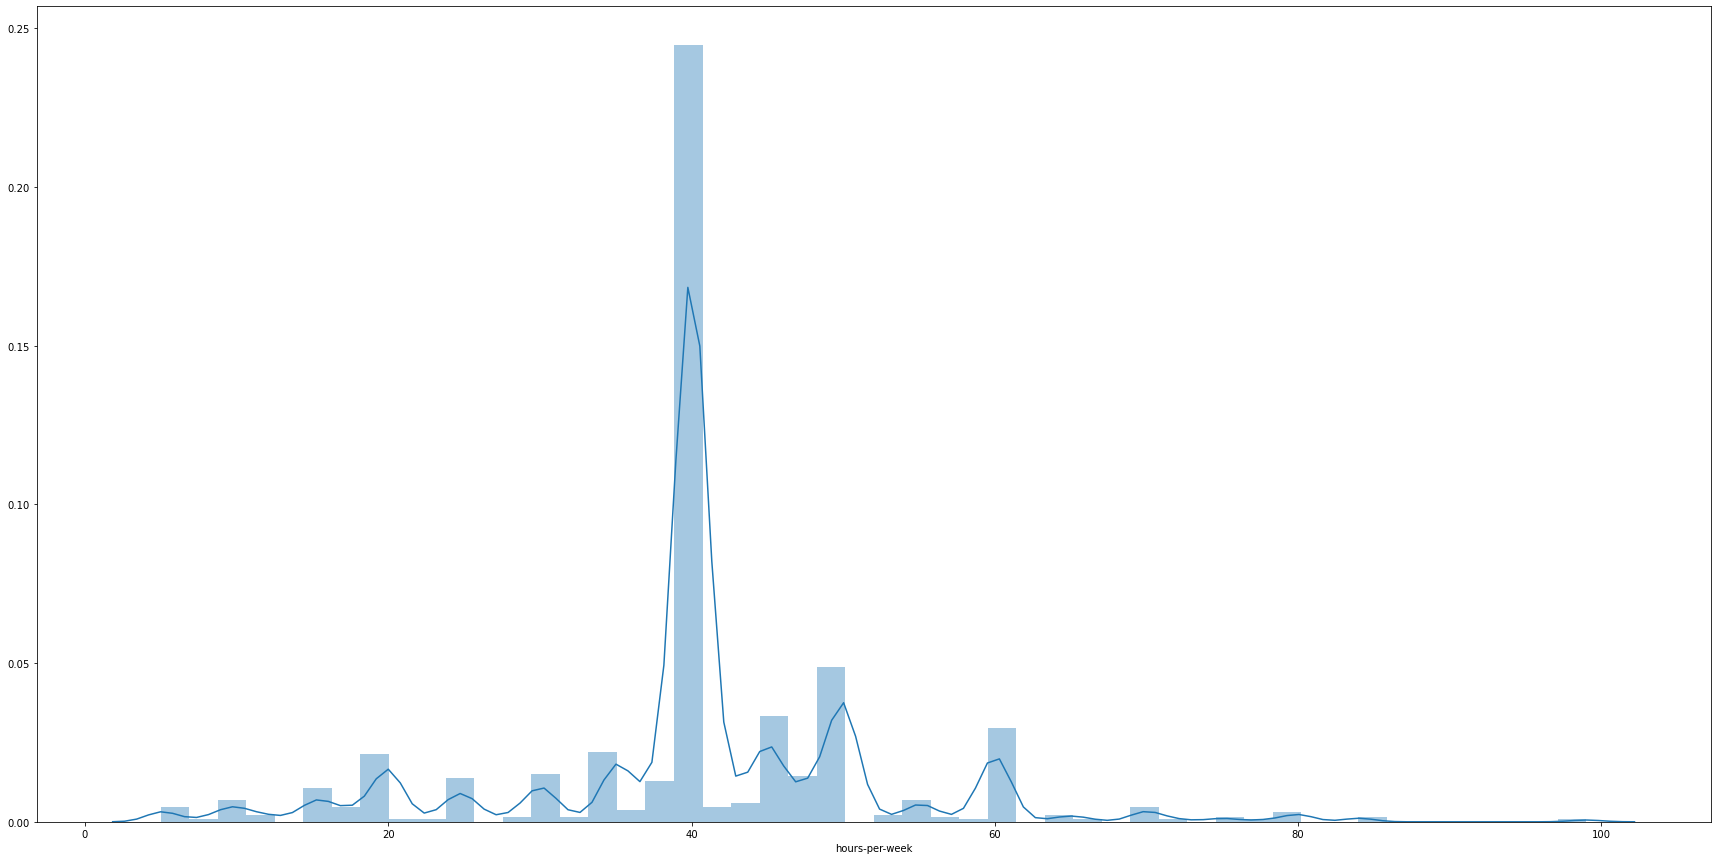

In [55]:
plt.figure(figsize=(30,15))
sns.distplot(dataset['hours-per-week'])

Inference Drawn:

Most people have to work around 40 hours per weak

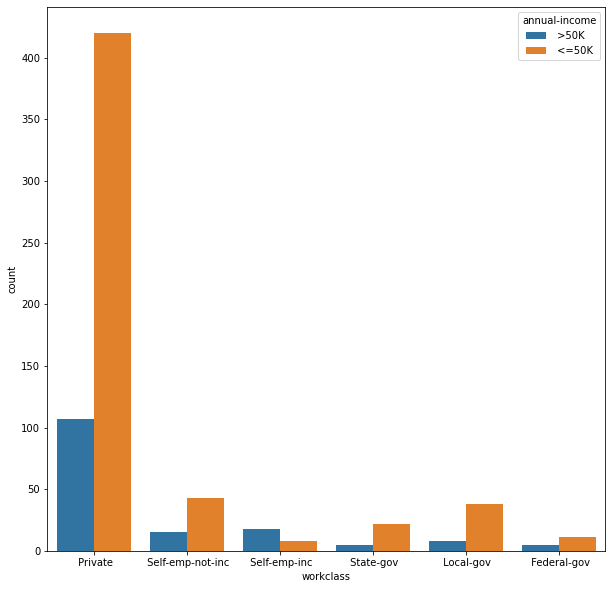

In [59]:
plt.figure(figsize=(10,10))
sns.countplot(dataset['workclass'],hue=dataset['annual-income'])

INFERENCES DRAWN:

people who are 'self-emp-inc' most of them have annual salary >=50k

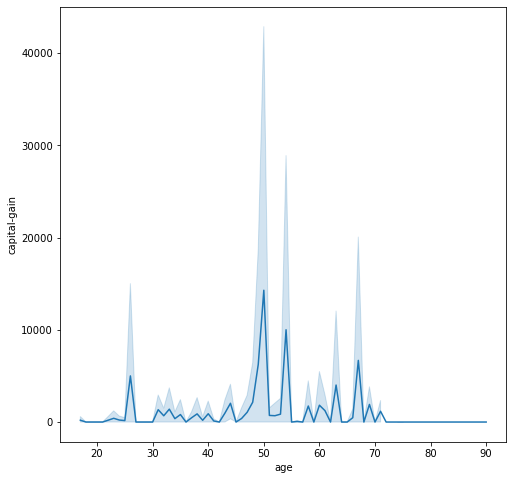

In [67]:
plt.figure(figsize=(8,8))
sns.lineplot(x = dataset['age'],y=dataset['capital-gain'])

### HYPOTHESIS TESTING

INFERENCE DRAWN:

most people between the age of 30-40 seem to have the highest capital gain

In [42]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests

df = pd.DataFrame(dataset)
ztest,pval=stests.ztest(df['hours-per-week'],x2=None,alternative='two-sided',value=40)
print(float(pval))

if(pval<0.05):
    print("reject null hypothesis")
else:
    print("failed to reject null hypothesis")



0.2300032856345623
failed to reject null hypothesis


Text(0.5, 1.0, 'Comparison between the level of education of a person and the hours worked per week')

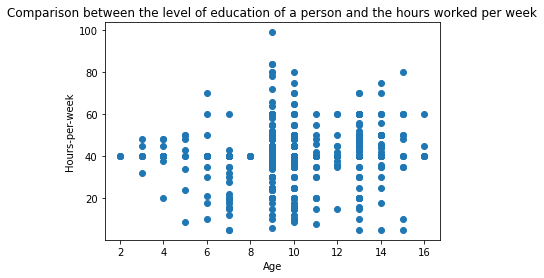

In [43]:
x1=df['education-num']
x2=df['hours-per-week']
plt.scatter(x1,x2)
plt.xlabel('Age')
plt.ylabel('Hours-per-week')
plt.title('Comparison between the level of education of a person and the hours worked per week')

In [44]:
#Pearson Correlation
from scipy.stats import pearsonr
corr,p_value=pearsonr(x1,x2)
print(corr)#weak correlation

nan


In [45]:
#Kendall Correlation
from scipy.stats import kendalltau
tau, p_value=kendalltau(x1,x2,initial_lexsort=True)
print(tau)

0.14240424489656722


In [46]:
#Spearman
from scipy.stats import spearmanr
rho,p_value=spearmanr(x1,x2)
print(rho)

0.18140060233785738


0.6493951864516319
33.99489346710487


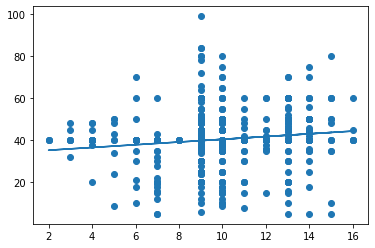

In [47]:
from statistics import mean
m = (((mean(x1)*mean(x2)) - mean(x1*x2)) /
         ((mean(x1)*mean(x1)) - mean(x1*x1)))
print(m)
b = mean(x2) - m*mean(x1)
print(b)
regression_line = [(m*x)+b for x in x1]
plt.scatter(x1,x2)
plt.plot(x1, regression_line)
plt.show()